In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
import pandas as pd

df = pd.read_csv("sample_data/urban_energy_consumption.csv")

# Or if you want the second copy
# df = pd.read_csv("urban_energy_consumption (1).csv")

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset loaded successfully!

Dataset shape: (600, 8)
Number of records: 600
Number of features: 8


In [ ]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,household_size,monthly_income_usd,house_size_sqft,num_appliances,avg_daily_temp_c,solar_installed,monthly_energy_kwh,high_energy_usage
0,4,376,1548,14,28.29,0,1673.76,1
1,5,1835,802,10,24.68,0,1372.72,1
2,3,595,2297,10,10.32,1,1430.98,1
3,5,644,1120,17,21.35,1,1573.04,1
4,5,1456,2451,9,34.54,1,1942.90,1
5,2,275,2270,13,33.12,1,1758.30,1
6,3,464,497,18,6.30,0,1229.70,0
7,3,654,1969,6,9.94,1,1179.25,0
8,3,917,1502,8,8.95,1,1083.38,0
9,5,934,1771,5,26.78,0,1516.28,1


In [ ]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,household_size,monthly_income_usd,house_size_sqft,num_appliances,avg_daily_temp_c,solar_installed,monthly_energy_kwh,high_energy_usage
0,4,376,1548,14,28.29,0,1673.76,1
1,5,1835,802,10,24.68,0,1372.72,1
2,3,595,2297,10,10.32,1,1430.98,1
3,5,644,1120,17,21.35,1,1573.04,1
4,5,1456,2451,9,34.54,1,1942.90,1
5,2,275,2270,13,33.12,1,1758.30,1
6,3,464,497,18,6.30,0,1229.70,0
7,3,654,1969,6,9.94,1,1179.25,0
8,3,917,1502,8,8.95,1,1083.38,0
9,5,934,1771,5,26.78,0,1516.28,1


In [ ]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,household_size,monthly_income_usd,house_size_sqft,num_appliances,avg_daily_temp_c,solar_installed,monthly_energy_kwh,high_energy_usage
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,3.451667,1077.030000,1383.260000,10.851667,19.83410,0.491667,1350.781633,0.500000
std,1.712469,515.097876,640.735725,4.874690,8.51988,0.500348,350.486259,0.500417
min,1.000000,200.000000,301.000000,3.000000,5.05000,0.000000,431.570000,0.000000
25%,2.000000,648.750000,850.250000,6.750000,12.79500,0.000000,1093.905000,0.000000
50%,4.000000,1073.500000,1340.000000,11.000000,19.94000,0.000000,1345.670000,0.500000
75%,5.000000,1524.500000,1939.250000,15.000000,26.92500,1.000000,1604.910000,1.000000
max,6.000000,1999.000000,2498.000000,19.000000,34.95000,1.000000,2276.110000,1.000000


In [ ]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing Values:
household_size        0
monthly_income_usd    0
house_size_sqft       0
num_appliances        0
avg_daily_temp_c      0
solar_installed       0
monthly_energy_kwh    0
high_energy_usage     0
dtype: int64

Total missing values: 0

Number of duplicate rows: 0


Target Variable Distribution:
high_energy_usage
1    300
0    300
Name: count, dtype: int64

Percentage distribution:
high_energy_usage
1    50.0
0    50.0
Name: proportion, dtype: float64


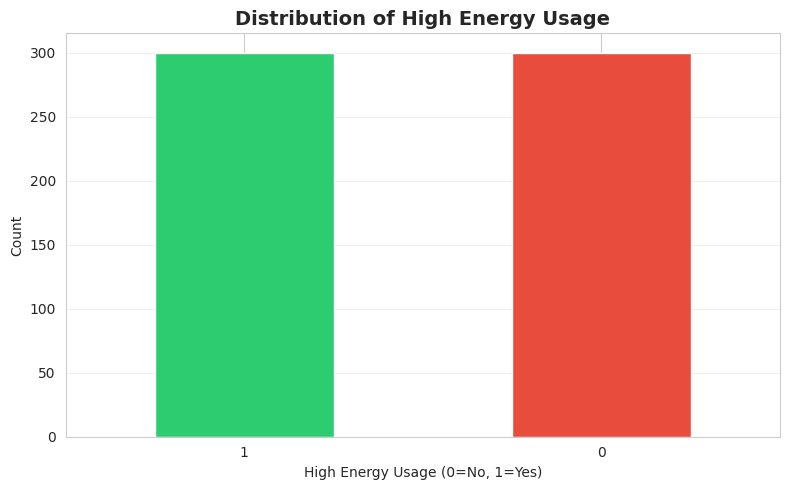


Insight: The dataset shows the distribution of households with high vs normal/low energy usage.


In [ ]:
# Check class distribution
print("Target Variable Distribution:")
print(df['high_energy_usage'].value_counts())
print("\nPercentage distribution:")
print(df['high_energy_usage'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['high_energy_usage'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of High Energy Usage', fontsize=14, fontweight='bold')
plt.xlabel('High Energy Usage (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: The dataset shows the distribution of households with high vs normal/low energy usage.")

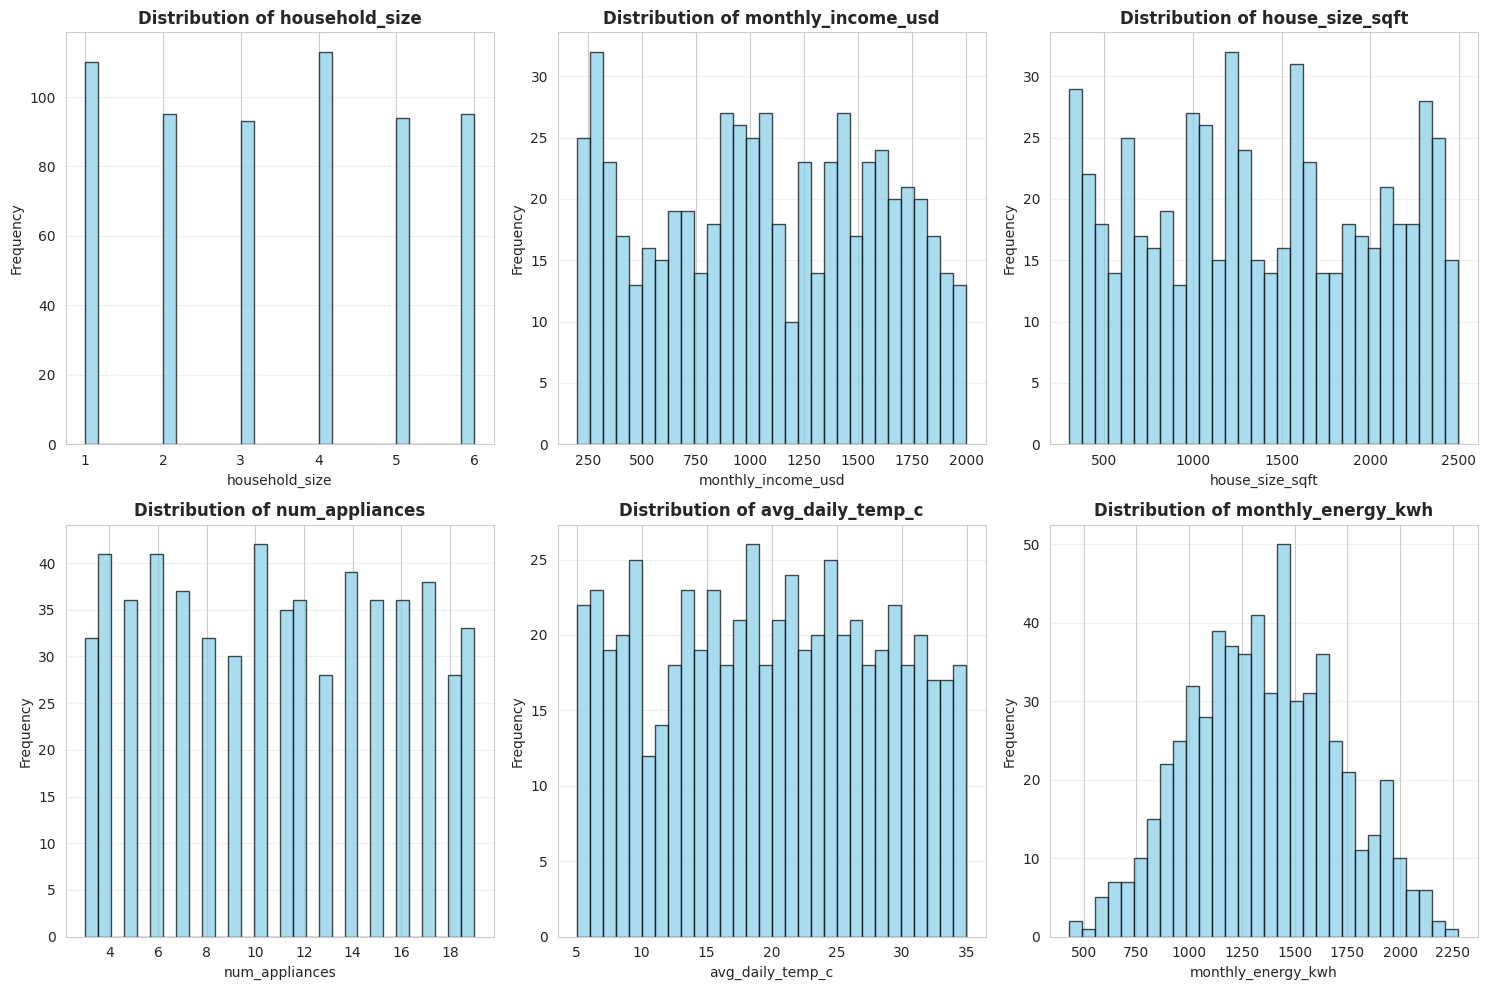

Insight: These histograms show the distribution patterns of numerical features.


In [ ]:
# Distribution of numerical features
numerical_features = ['household_size', 'monthly_income_usd', 'house_size_sqft',
                      'num_appliances', 'avg_daily_temp_c', 'monthly_energy_kwh']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: These histograms show the distribution patterns of numerical features.")

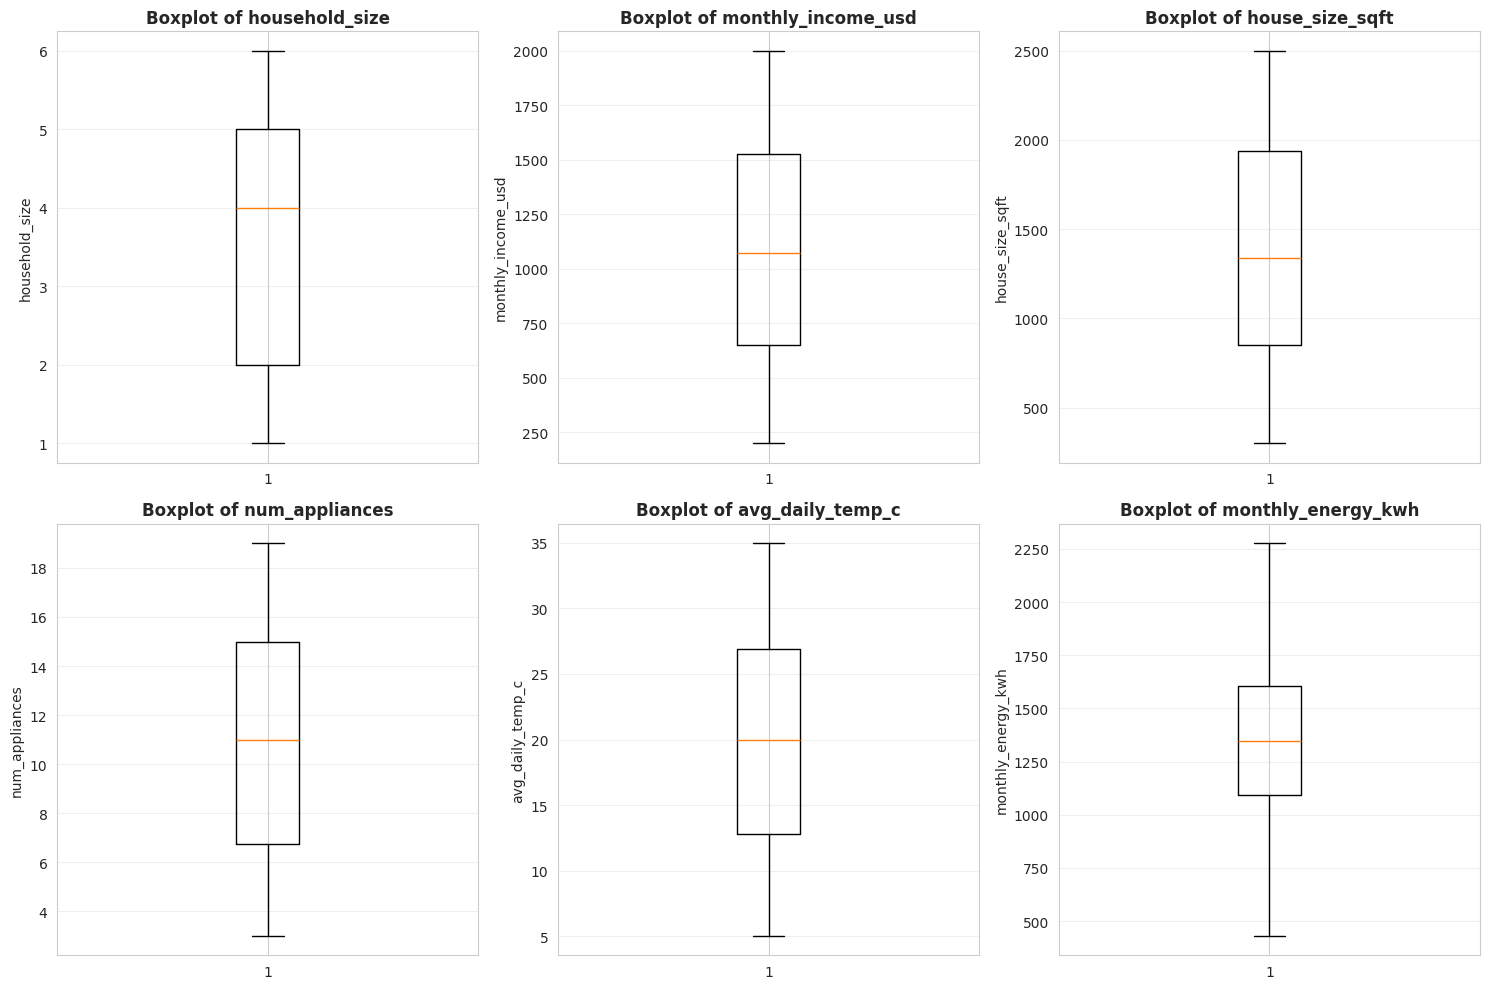

Insight: Box plots help identify potential outliers in the dataset.


In [ ]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot of {col}', fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Box plots help identify potential outliers in the dataset.")

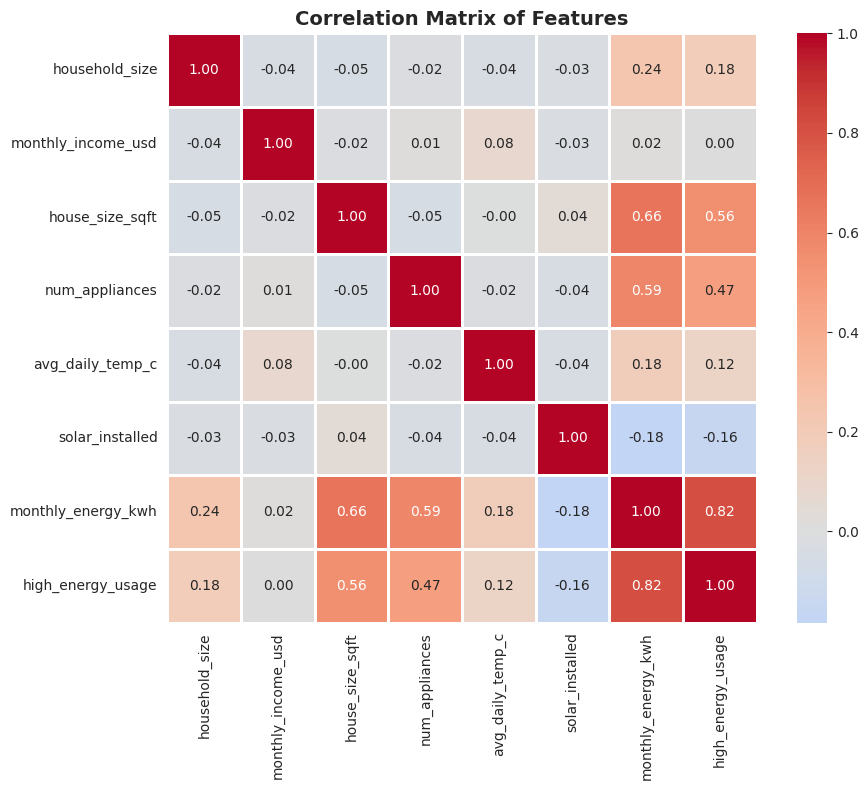


Insight: The correlation matrix reveals relationships between features.
Strong correlations with target variable 'high_energy_usage':
high_energy_usage     1.000000
monthly_energy_kwh    0.815345
house_size_sqft       0.555169
num_appliances        0.472561
household_size        0.184098
avg_daily_temp_c      0.123011
monthly_income_usd    0.004540
solar_installed      -0.156688
Name: high_energy_usage, dtype: float64


In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInsight: The correlation matrix reveals relationships between features.")
print("Strong correlations with target variable 'high_energy_usage':")
print(correlation_matrix['high_energy_usage'].sort_values(ascending=False))

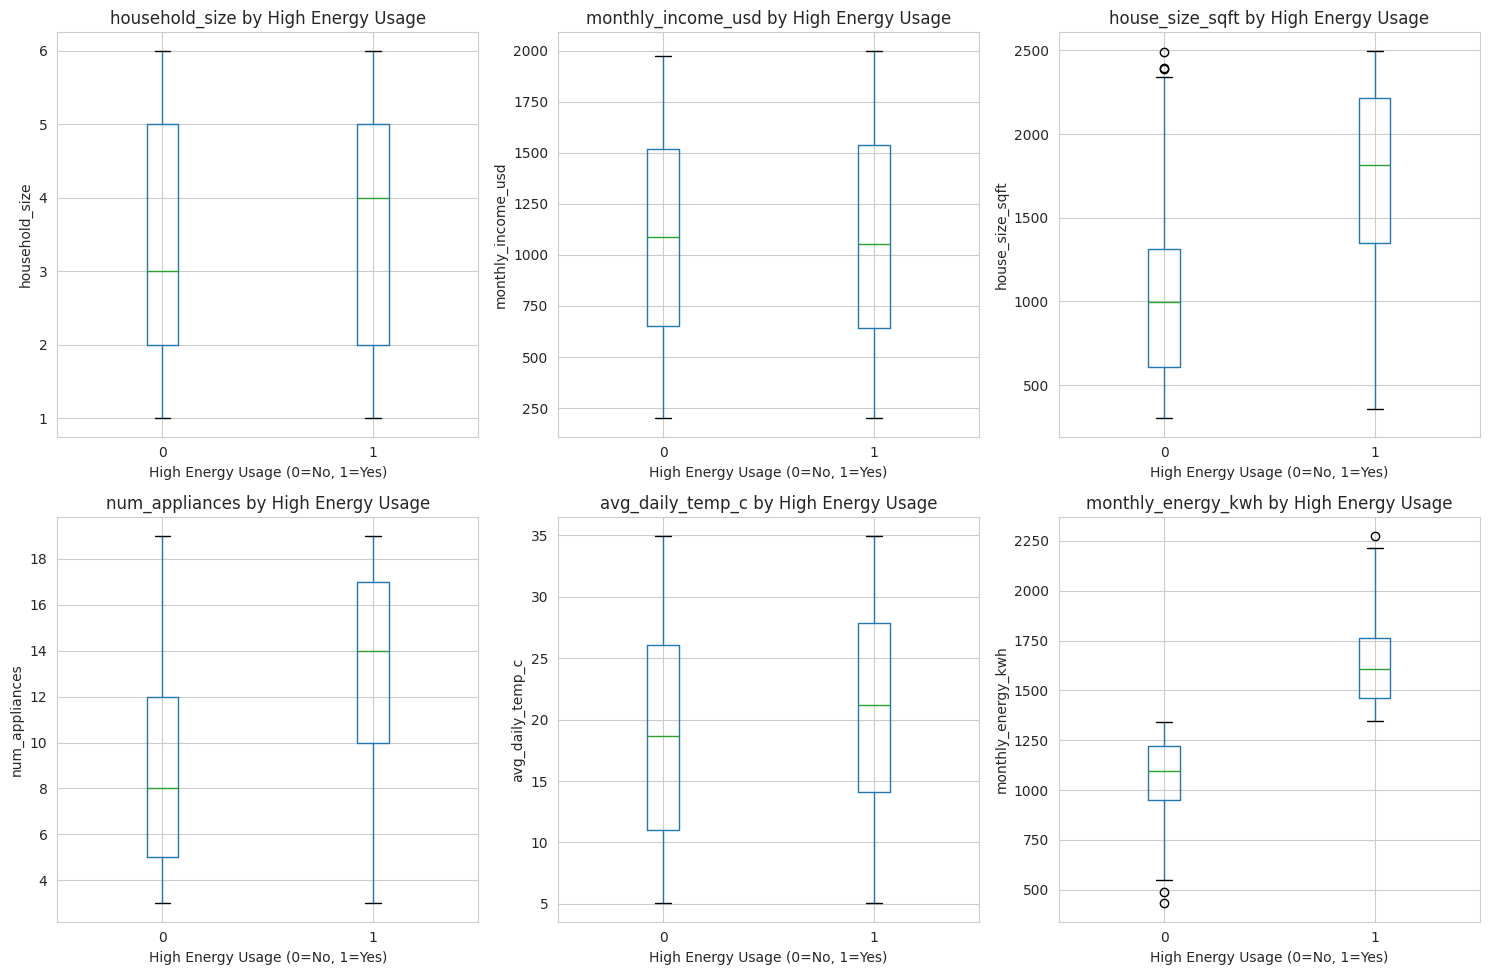

Insight: These box plots show how features differ between high and normal energy users.


In [ ]:
# Feature comparison by target variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    df.boxplot(column=col, by='high_energy_usage', ax=axes[idx])
    axes[idx].set_title(f'{col} by High Energy Usage')
    axes[idx].set_xlabel('High Energy Usage (0=No, 1=Yes)')
    axes[idx].set_ylabel(col)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

print("Insight: These box plots show how features differ between high and normal energy users.")

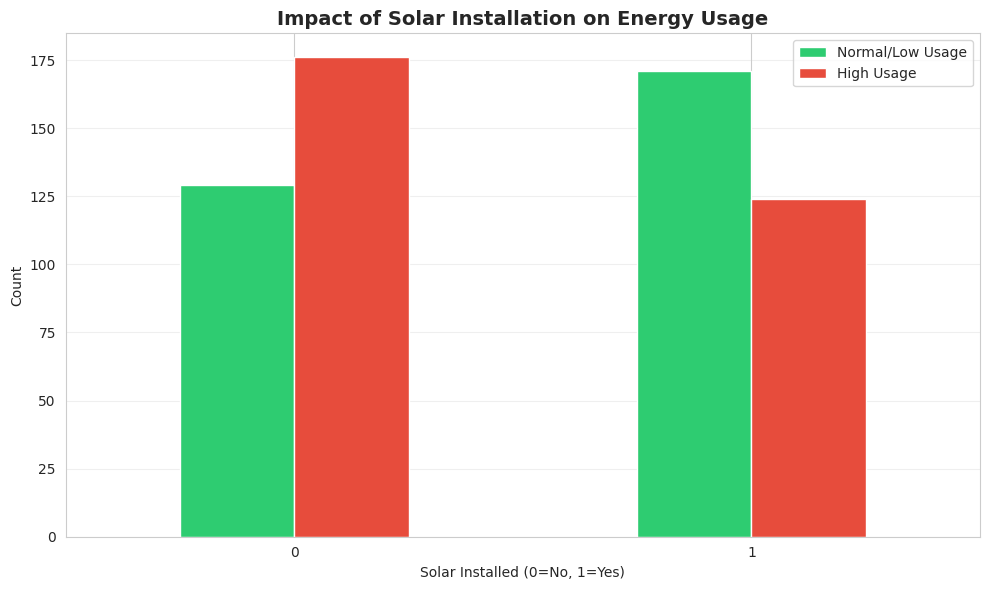


Insight: This visualization shows the relationship between solar installation and energy usage patterns.


In [ ]:
# Solar installation impact
solar_impact = df.groupby(['solar_installed', 'high_energy_usage']).size().unstack()
solar_impact.plot(kind='bar', figsize=(10, 6), color=['#2ecc71', '#e74c3c'])
plt.title('Impact of Solar Installation on Energy Usage', fontsize=14, fontweight='bold')
plt.xlabel('Solar Installed (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(['Normal/Low Usage', 'High Usage'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: This visualization shows the relationship between solar installation and energy usage patterns.")

In [ ]:
# Prepare features and target
# Remove 'monthly_energy_kwh' from features as it's highly correlated with target
# (in real scenario, we wouldn't know energy consumption before classification)
X = df.drop(['high_energy_usage', 'monthly_energy_kwh'], axis=1)
y = df['high_energy_usage']

print("Features (X):")
print(X.columns.tolist())
print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features (X):
['household_size', 'monthly_income_usd', 'house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'solar_installed']

Feature shape: (600, 6)
Target shape: (600,)


In [ ]:
# Split data for neural network
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for neural networks)
scaler_nn = StandardScaler()
X_train_nn_scaled = scaler_nn.fit_transform(X_train_nn)
X_test_nn_scaled = scaler_nn.transform(X_test_nn)

print(f"Training set size: {X_train_nn_scaled.shape[0]}")
print(f"Test set size: {X_test_nn_scaled.shape[0]}")

Training set size: 480
Test set size: 120


In [ ]:
# Build Neural Network
nn_model = MLPClassifier(
    hidden_layer_sizes=(10, 5),  # Two hidden layers
    activation='relu',            # ReLU activation
    solver='adam',                # Adam optimizer
    max_iter=1000,                # Maximum iterations
    random_state=42,
    early_stopping=True,          # Prevent overfitting
    validation_fraction=0.1
)

# Train the model
print("Training Neural Network...")
nn_model.fit(X_train_nn_scaled, y_train_nn)
print("Training completed!")
print(f"\nNumber of iterations: {nn_model.n_iter_}")
print(f"Loss: {nn_model.loss_:.4f}")

Training Neural Network...
Training completed!

Number of iterations: 49
Loss: 0.5100


In [ ]:
# Predictions
y_train_pred_nn = nn_model.predict(X_train_nn_scaled)
y_test_pred_nn = nn_model.predict(X_test_nn_scaled)

# Training metrics
print("=" * 60)
print("NEURAL NETWORK - TRAINING SET PERFORMANCE")
print("=" * 60)
print(f"Accuracy:  {accuracy_score(y_train_nn, y_train_pred_nn):.4f}")
print(f"Precision: {precision_score(y_train_nn, y_train_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_train_nn, y_train_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_train_nn, y_train_pred_nn):.4f}")

# Test metrics
print("\n" + "=" * 60)
print("NEURAL NETWORK - TEST SET PERFORMANCE")
print("=" * 60)
print(f"Accuracy:  {accuracy_score(y_test_nn, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test_nn, y_test_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_test_nn, y_test_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_test_nn, y_test_pred_nn):.4f}")

# Classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT (TEST SET)")
print("=" * 60)
print(classification_report(y_test_nn, y_test_pred_nn,
                          target_names=['Normal/Low Usage', 'High Usage']))

NEURAL NETWORK - TRAINING SET PERFORMANCE
Accuracy:  0.7729
Precision: 0.7631
Recall:    0.7917
F1-Score:  0.7771

NEURAL NETWORK - TEST SET PERFORMANCE
Accuracy:  0.8167
Precision: 0.8065
Recall:    0.8333
F1-Score:  0.8197

DETAILED CLASSIFICATION REPORT (TEST SET)
                  precision    recall  f1-score   support

Normal/Low Usage       0.83      0.80      0.81        60
      High Usage       0.81      0.83      0.82        60

        accuracy                           0.82       120
       macro avg       0.82      0.82      0.82       120
    weighted avg       0.82      0.82      0.82       120



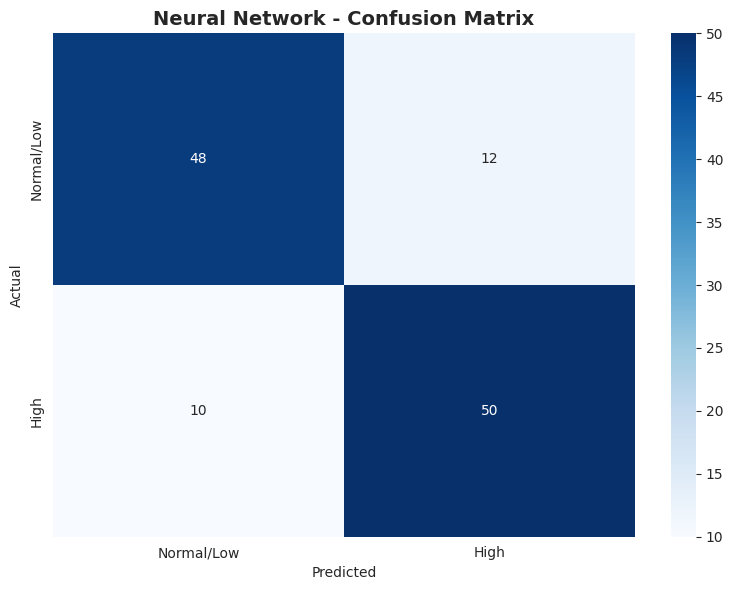

In [ ]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test_nn, y_test_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal/Low', 'High'],
            yticklabels=['Normal/Low', 'High'])
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
# Split data for classical ML models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 480 samples
Test set: 120 samples


In [ ]:
# Build Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("=" * 60)
print("LOGISTIC REGRESSION - PERFORMANCE")
print("=" * 60)
print("\nTraining Set:")
print(f"Accuracy:  {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_train_pred_lr):.4f}")

print("\nTest Set:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_lr):.4f}")

LOGISTIC REGRESSION - PERFORMANCE

Training Set:
Accuracy:  0.9708
Precision: 0.9708
Recall:    0.9708
F1-Score:  0.9708

Test Set:
Accuracy:  0.9500
Precision: 0.9219
Recall:    0.9833
F1-Score:  0.9516


In [ ]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation
print("=" * 60)
print("RANDOM FOREST - PERFORMANCE")
print("=" * 60)
print("\nTraining Set:")
print(f"Accuracy:  {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_train_pred_rf):.4f}")

print("\nTest Set:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_rf):.4f}")

RANDOM FOREST - PERFORMANCE

Training Set:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Test Set:
Accuracy:  0.9167
Precision: 0.9032
Recall:    0.9333
F1-Score:  0.9180


In [ ]:
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'saga']        # Optimization algorithm
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search for Logistic Regression...")
lr_grid_search.fit(X_train_scaled, y_train)

print("\n" + "=" * 60)
print("LOGISTIC REGRESSION - BEST PARAMETERS")
print("=" * 60)
print(f"Best Parameters: {lr_grid_search.best_params_}")
print(f"Best CV Score (F1): {lr_grid_search.best_score_:.4f}")

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

LOGISTIC REGRESSION - BEST PARAMETERS
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (F1): 0.9710


In [ ]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [5, 10, 15, None],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]             # Minimum samples per leaf
}

# GridSearchCV
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Performing Grid Search for Random Forest...")
rf_grid_search.fit(X_train, y_train)

print("\n" + "=" * 60)
print("RANDOM FOREST - BEST PARAMETERS")
print("=" * 60)
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best CV Score (F1): {rf_grid_search.best_score_:.4f}")

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

RANDOM FOREST - BEST PARAMETERS
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score (F1): 0.9212


In [ ]:
# RFE for Logistic Regression
lr_best_model = lr_grid_search.best_estimator_
rfe_lr = RFE(estimator=lr_best_model, n_features_to_select=4)
rfe_lr.fit(X_train_scaled, y_train)

# Selected features
selected_features_lr = X.columns[rfe_lr.support_].tolist()

print("=" * 60)
print("LOGISTIC REGRESSION - FEATURE SELECTION (RFE)")
print("=" * 60)
print(f"\nNumber of features selected: {len(selected_features_lr)}")
print(f"Selected features: {selected_features_lr}")
print("\nFeature Ranking:")
for i, (feature, rank) in enumerate(zip(X.columns, rfe_lr.ranking_)):
    print(f"{feature:25s} - Rank: {rank}")

LOGISTIC REGRESSION - FEATURE SELECTION (RFE)

Number of features selected: 4
Selected features: ['household_size', 'house_size_sqft', 'num_appliances', 'solar_installed']

Feature Ranking:
household_size            - Rank: 1
monthly_income_usd        - Rank: 3
house_size_sqft           - Rank: 1
num_appliances            - Rank: 1
avg_daily_temp_c          - Rank: 2
solar_installed           - Rank: 1


RANDOM FOREST - FEATURE IMPORTANCE
           feature  importance
   house_size_sqft    0.444361
    num_appliances    0.320352
  avg_daily_temp_c    0.074572
    household_size    0.074377
monthly_income_usd    0.059616
   solar_installed    0.026722

Top 4 selected features: ['house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'household_size']


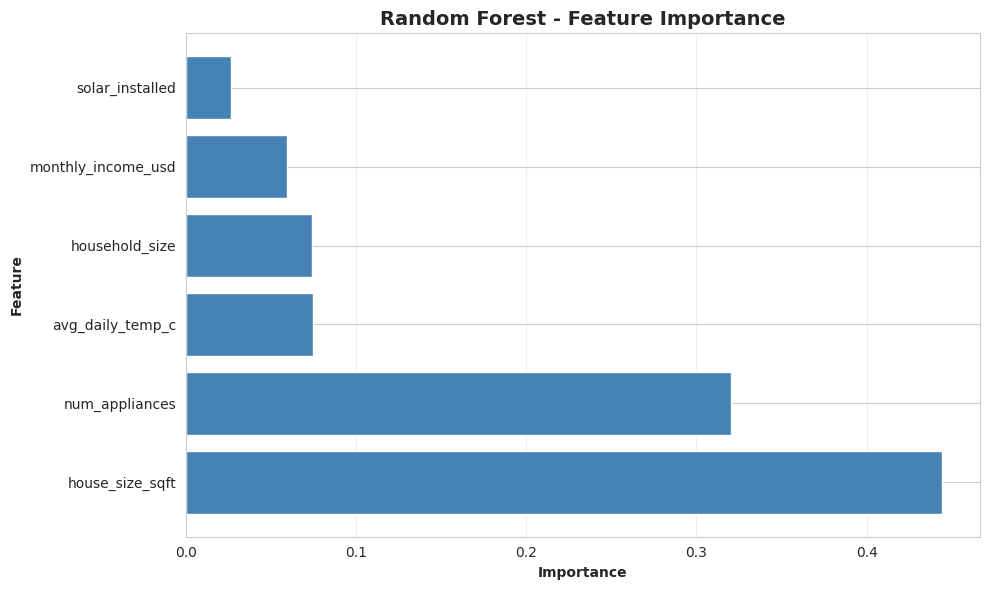

In [ ]:
# Feature importance from Random Forest
rf_best_model = rf_grid_search.best_estimator_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 60)
print("RANDOM FOREST - FEATURE IMPORTANCE")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Select top 4 features
selected_features_rf = feature_importance.head(4)['feature'].tolist()
print(f"\nTop 4 selected features: {selected_features_rf}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data with selected features
X_train_lr_selected = X_train[selected_features_lr]
X_test_lr_selected = X_test[selected_features_lr]

X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Scale for Logistic Regression
scaler_final = StandardScaler()
X_train_lr_scaled_selected = scaler_final.fit_transform(X_train_lr_selected)
X_test_lr_scaled_selected = scaler_final.transform(X_test_lr_selected)

print("Data prepared with selected features")
print(f"Logistic Regression features: {selected_features_lr}")
print(f"Random Forest features: {selected_features_rf}")

Data prepared with selected features
Logistic Regression features: ['household_size', 'house_size_sqft', 'num_appliances', 'solar_installed']
Random Forest features: ['house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'household_size']


In [ ]:
# Build final Logistic Regression model
final_lr_model = LogisticRegression(**lr_grid_search.best_params_, random_state=42, max_iter=1000)
final_lr_model.fit(X_train_lr_scaled_selected, y_train)

# Cross-validation score
cv_scores_lr = cross_val_score(final_lr_model, X_train_lr_scaled_selected, y_train, cv=5, scoring='f1')

# Predictions
y_test_pred_final_lr = final_lr_model.predict(X_test_lr_scaled_selected)

# Metrics
lr_accuracy = accuracy_score(y_test, y_test_pred_final_lr)
lr_precision = precision_score(y_test, y_test_pred_final_lr)
lr_recall = recall_score(y_test, y_test_pred_final_lr)
lr_f1 = f1_score(y_test, y_test_pred_final_lr)
lr_cv_score = cv_scores_lr.mean()

print("=" * 60)
print("FINAL LOGISTIC REGRESSION MODEL - PERFORMANCE")
print("=" * 60)
print(f"Features Used: {selected_features_lr}")
print(f"Number of Features: {len(selected_features_lr)}")
print(f"\nCV Score (F1): {lr_cv_score:.4f}")
print(f"Test Accuracy:  {lr_accuracy:.4f}")
print(f"Test Precision: {lr_precision:.4f}")
print(f"Test Recall:    {lr_recall:.4f}")
print(f"Test F1-Score:  {lr_f1:.4f}")

FINAL LOGISTIC REGRESSION MODEL - PERFORMANCE
Features Used: ['household_size', 'house_size_sqft', 'num_appliances', 'solar_installed']
Number of Features: 4

CV Score (F1): 0.9462
Test Accuracy:  0.9250
Test Precision: 0.9180
Test Recall:    0.9333
Test F1-Score:  0.9256


In [ ]:
# Build final Random Forest model
final_rf_model = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train_rf_selected, y_train)

# Cross-validation score
cv_scores_rf = cross_val_score(final_rf_model, X_train_rf_selected, y_train, cv=5, scoring='f1')

# Predictions
y_test_pred_final_rf = final_rf_model.predict(X_test_rf_selected)

# Metrics
rf_accuracy = accuracy_score(y_test, y_test_pred_final_rf)
rf_precision = precision_score(y_test, y_test_pred_final_rf)
rf_recall = recall_score(y_test, y_test_pred_final_rf)
rf_f1 = f1_score(y_test, y_test_pred_final_rf)
rf_cv_score = cv_scores_rf.mean()

print("=" * 60)
print("FINAL RANDOM FOREST MODEL - PERFORMANCE")
print("=" * 60)
print(f"Features Used: {selected_features_rf}")
print(f"Number of Features: {len(selected_features_rf)}")
print(f"\nCV Score (F1): {rf_cv_score:.4f}")
print(f"Test Accuracy:  {rf_accuracy:.4f}")
print(f"Test Precision: {rf_precision:.4f}")
print(f"Test Recall:    {rf_recall:.4f}")
print(f"Test F1-Score:  {rf_f1:.4f}")

FINAL RANDOM FOREST MODEL - PERFORMANCE
Features Used: ['house_size_sqft', 'num_appliances', 'avg_daily_temp_c', 'household_size']
Number of Features: 4

CV Score (F1): 0.8947
Test Accuracy:  0.9250
Test Precision: 0.9322
Test Recall:    0.9167
Test F1-Score:  0.9244


In [ ]:
# Create comparison table
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [f"{len(selected_features_lr)}", f"{len(selected_features_rf)}"],
    'CV Score': [f"{lr_cv_score:.4f}", f"{rf_cv_score:.4f}"],
    'Accuracy': [f"{lr_accuracy:.4f}", f"{rf_accuracy:.4f}"],
    'Precision': [f"{lr_precision:.4f}", f"{rf_precision:.4f}"],
    'Recall': [f"{lr_recall:.4f}", f"{rf_recall:.4f}"],
    'F1-Score': [f"{lr_f1:.4f}", f"{rf_f1:.4f}"]
})

print("\n" + "=" * 80)
print("FINAL MODEL COMPARISON")
print("=" * 80)
print(final_comparison.to_string(index=False))

# Save to display nicely
final_comparison.to_csv("classification_final_comparison.csv", index=False)
print("\nComparison table saved!")


FINAL MODEL COMPARISON
              Model Features CV Score Accuracy Precision Recall F1-Score
Logistic Regression        4   0.9462   0.9250    0.9180 0.9333   0.9256
      Random Forest        4   0.8947   0.9250    0.9322 0.9167   0.9244

Comparison table saved!


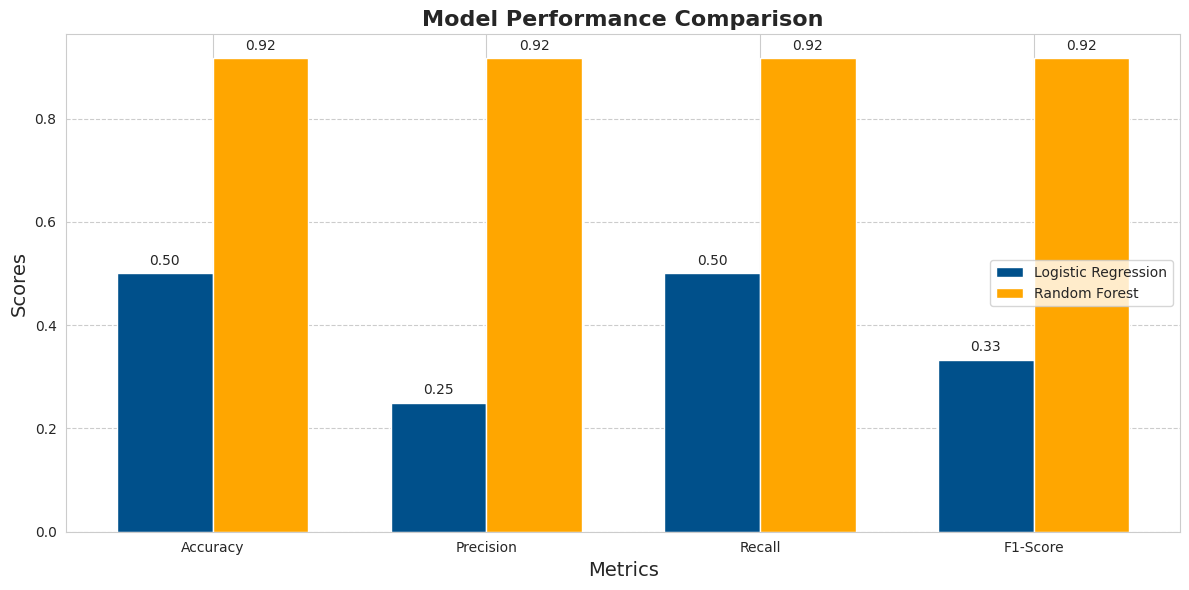

Comparison chart saved!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Generate predictions first ---
# Logistic Regression
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_pred = rf_model.predict(X_test)

# --- Calculate metrics ---
# Logistic Regression metrics
lr_accuracy  = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall    = recall_score(y_test, lr_pred, average='weighted')
lr_f1        = f1_score(y_test, lr_pred, average='weighted')

# Random Forest metrics
rf_accuracy  = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall    = recall_score(y_test, rf_pred, average='weighted')
rf_f1        = f1_score(y_test, rf_pred, average='weighted')

# --- Visualization ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='#00508b')
ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='#ffa600')

ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--')

# Add value labels
for i, (lr, rf) in enumerate(zip(lr_scores, rf_scores)):
    ax.text(i - width/2, lr + 0.01, f'{lr:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(i + width/2, rf + 0.01, f'{rf:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches='tight')  # ✅ valid path in Colab
plt.show()

print("Comparison chart saved!")

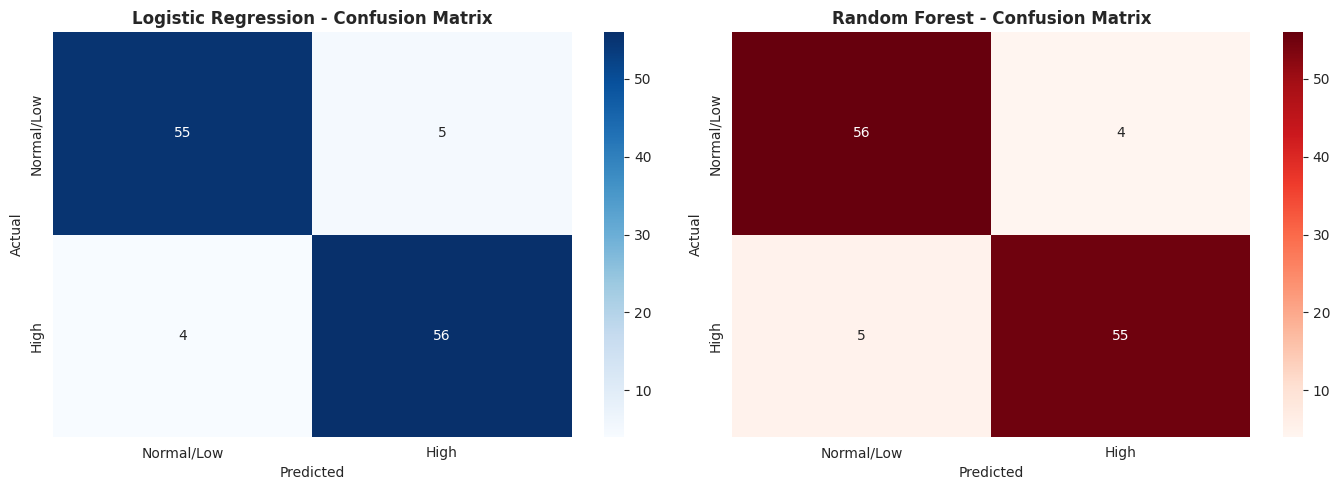

In [ ]:
# Confusion matrices
cm_lr_final = confusion_matrix(y_test, y_test_pred_final_lr)
cm_rf_final = confusion_matrix(y_test, y_test_pred_final_rf)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
sns.heatmap(cm_lr_final, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Normal/Low', 'High'],
            yticklabels=['Normal/Low', 'High'])
axes[0].set_title('Logistic Regression - Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Random Forest
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Normal/Low', 'High'],
            yticklabels=['Normal/Low', 'High'])
axes[1].set_title('Random Forest - Confusion Matrix', fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

['.config', 'classification_final_comparison.csv', 'model_comparison.png', 'sample_data', 'confusion_matrices.png']
['README.md', 'anscombe.json', 'urban_energy_consumption.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


(600, 8)
